In [2]:
import pandas as pd

In [119]:
data = pd.read_csv('merged_results.csv')

data.head()

# Create a new data set with the column: 'id', 'group', 'value', 'attribute'
# where 'attribute' is the name of the columne (Listening, Paper, Q1, Q2,Q3,Q4) and 'value' is the response to the question

dataMetrics = data.melt(id_vars=['Id', 'Group'], value_vars=['Listening', 'Paper'], var_name='attribute', value_name='value')
dataQuestionnaire = data.melt(id_vars=['Id', 'Group'], value_vars=[ 'Q1', 'Q2', 'Q3', 'Q4'], var_name='attribute', value_name='value')
dataUEQS = data.melt(id_vars=['Id', 'Group'], value_vars=['U1','U2','U3','U4', 'U5', 'U6', 'U7', 'U8'], var_name='attribute', value_name='value')

#Renaming attribute of dataMetrics to 'Nb of step listening' and 'Nb of paper instructions watched'
dataMetrics['attribute'] = dataMetrics['attribute'].replace({'Listening': 'Nb of step listening', 'Paper': 'Nb of paper instructions watched'})

data.describe( include='all')

,Id,Group,Listening,Paper,Q1,Q2,Q3,Q4,U1,U2,U3,U4,U5,U6,U7,U8
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,6.100000,1.500000,16.300000,6.300000,2.600000,2.400000,2.500000,2.600000,4.400000,5.000000,3.900000,3.300000,3.700000,4.200000,3.700000,3.500000
std,3.478505,0.527046,2.496664,2.710064,1.429841,1.264911,0.849837,1.074968,0.966092,0.816497,1.197219,1.337494,1.766981,0.918937,0.823273,0.527046
min,1.000000,1.000000,13.000000,3.000000,1.000000,1.000000,1.000000,1.000000,3.000000,4.000000,2.000000,1.000000,1.000000,3.000000,2.000000,3.000000
25%,3.250000,1.000000,15.000000,3.750000,1.250000,2.000000,2.000000,2.000000,4.000000,4.250000,3.000000,2.250000,2.250000,4.000000,3.250000,3.000000
50%,6.500000,1.500000,16.000000,6.500000,2.500000,2.000000,2.500000,3.000000,4.500000,5.000000,4.000000,3.500000,3.500000,4.000000,4.000000,3.500000
75%,8.750000,2.000000,17.000000,7.750000,3.750000,2.750000,3.000000,3.000000,5.000000,5.750000,4.750000,4.000000,5.000000,4.750000,4.000000,4.000000
max,11.000000,2.000000,22.000000,11.000000,5.000000,5.000000,4.000000,4.000000,6.000000,6.000000,6.000000,5.000000,6.000000,6.000000,5.000000,4.000000


ValueError: value_name (value) cannot match an element in the DataFrame columns.

Plot bar chart of mean and standard deviation with all question responses for each group

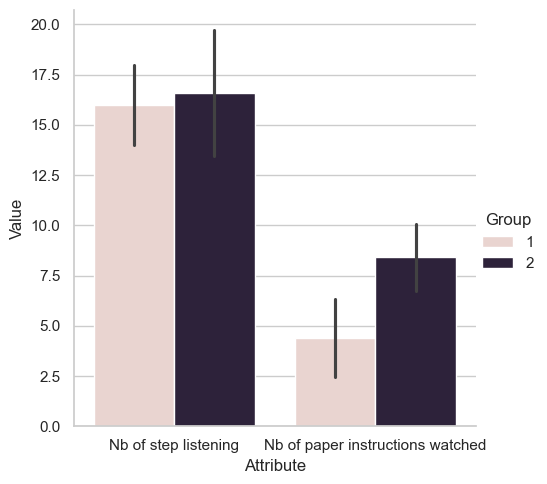

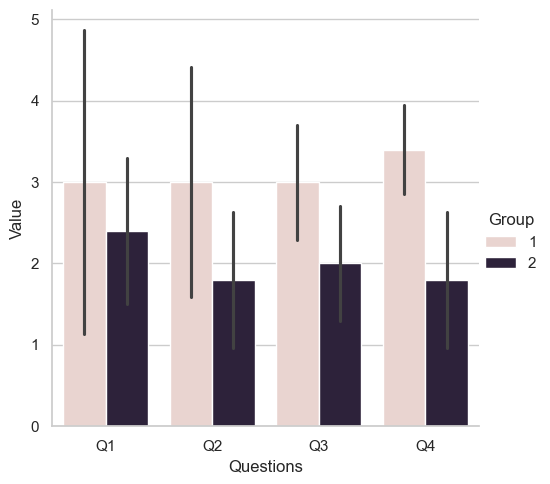

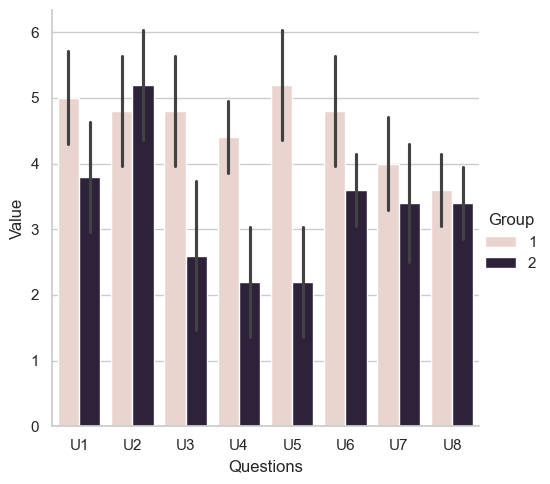

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
sns.color_palette("hls", 8)

f = sns.catplot(x="attribute", y="value", hue="Group", data=dataMetrics, kind="bar", errorbar='sd')
#set axis labels
f.set_axis_labels("Attribute", "Value")
#Save the figure
f.savefig('metrics.png')

f = sns.catplot(x="attribute", y="value", hue="Group", data=dataQuestionnaire, kind="bar", errorbar='sd')
f.set_axis_labels("Questions", "Value")
#Save the figure
f.savefig('questionnaire.png')

f = sns.catplot(x="attribute", y="value", hue="Group", data=dataUEQS, kind="bar", errorbar='sd')
f.set_axis_labels("Questions", "Value")
f.savefig('ueqs.png')

## Plot histogram for the question responses (Q1, Q2, Q3, Q4 and U1, U2, U3, U4, U5, U6, U7, U8)

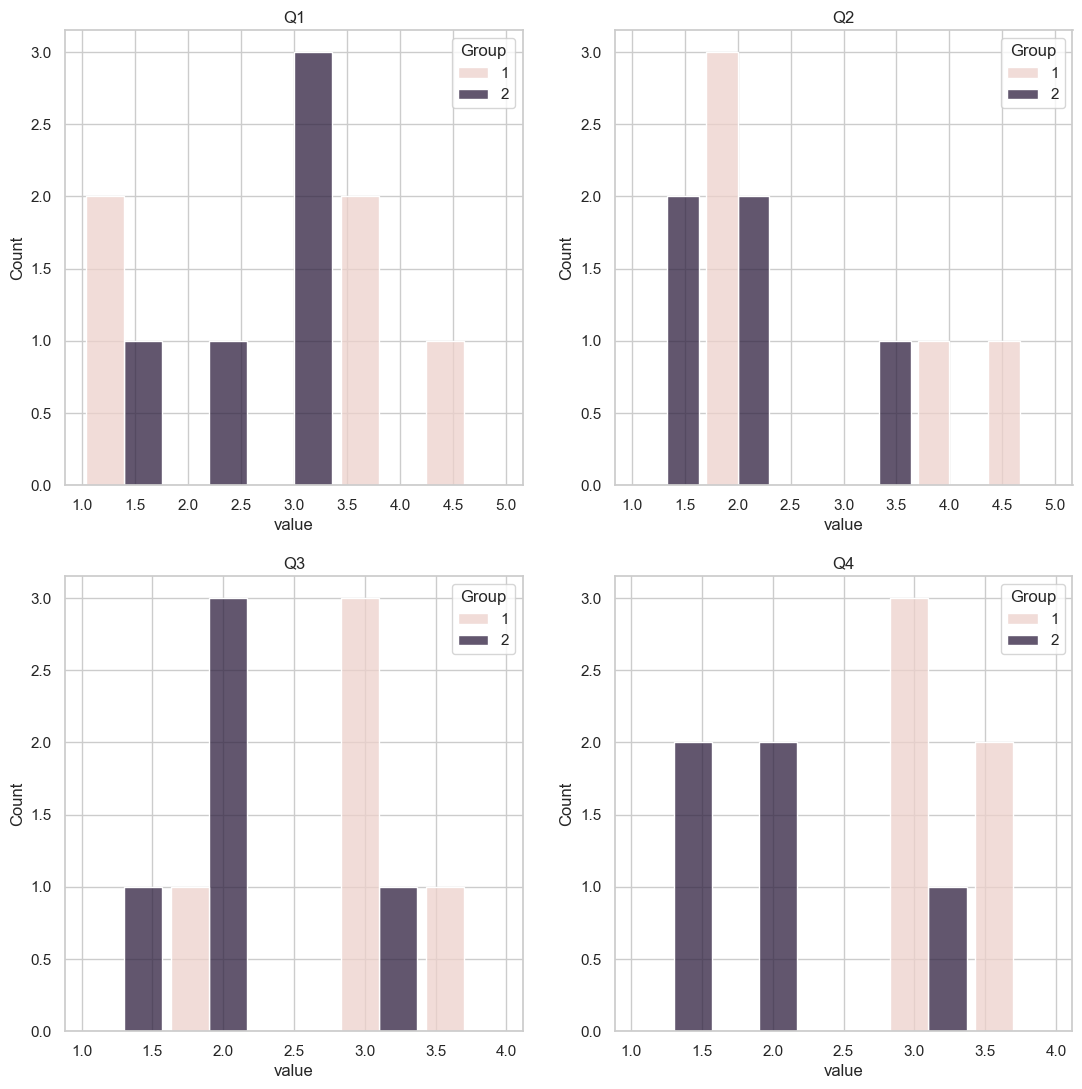

In [99]:
#Plot histogram for the question responses (Q1, Q2, Q3, Q4 and U1, U2, U3, U4, U5, U6, U7, U8)
fig, axs = plt.subplots(2, 2, figsize=(13, 13))
#Plot on each subplot the histogram of the question responses for both groups 
#For example, axs[0,0] is the first subplot, with the histogram of the question responses Q1 for Group 1 and Group 2
for i, question in enumerate(['Q1', 'Q2', 'Q3', 'Q4']):
    sns.histplot(dataQuestionnaire[dataQuestionnaire['attribute'] == question], x='value', hue='Group', multiple="dodge", ax=axs[i//2, i%2], shrink=.9)
    axs[i//2, i%2].set_title(question)
    
#save 
plt.savefig('questionnaire_histogram.png')


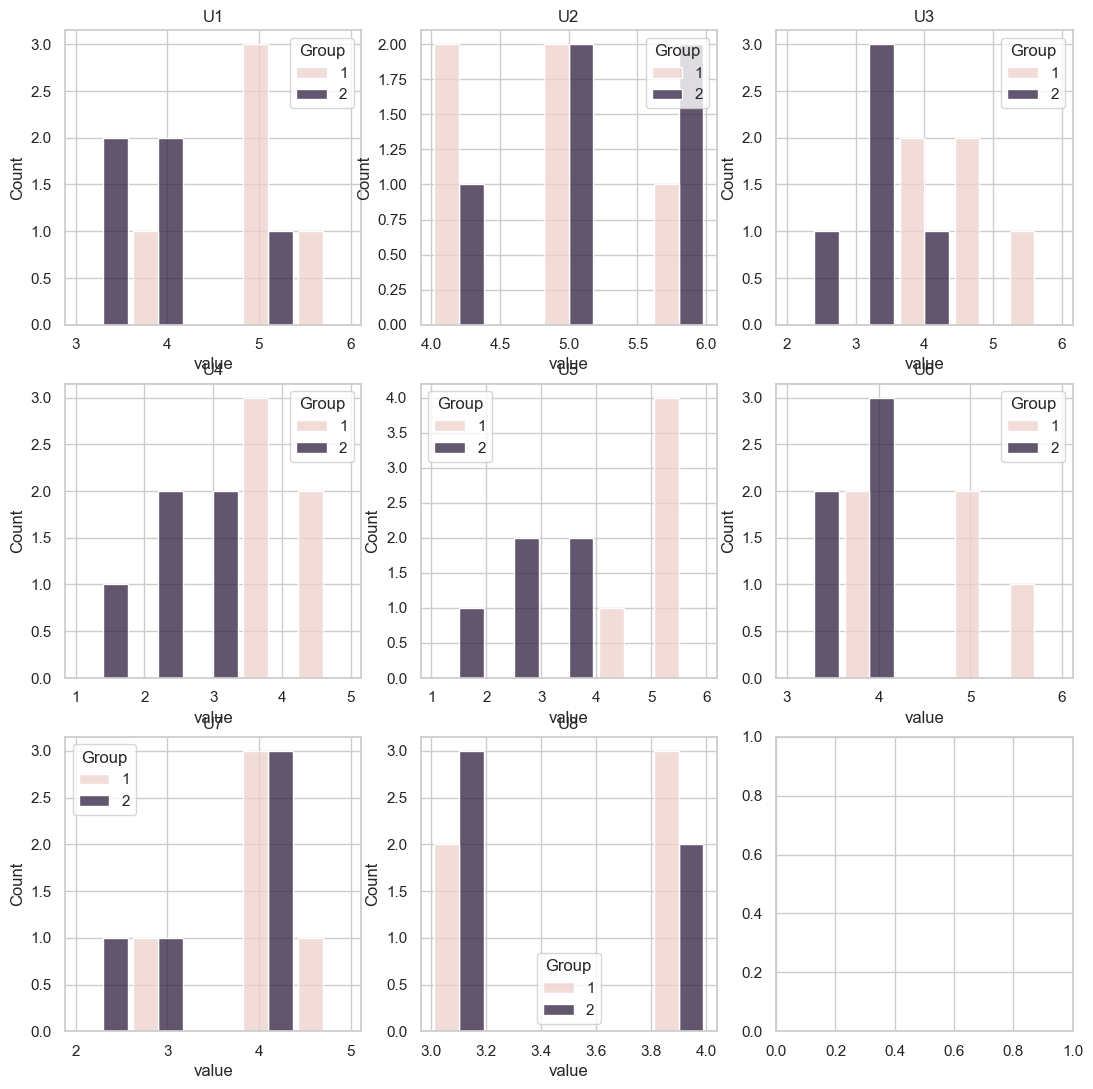

In [66]:
#Plot histogram for the question responses ( U1, U2, U3, U4, U5, U6, U7, U8)
fig, axs = plt.subplots(3, 3, figsize=(13, 13))
#Plot on each subplot the histogram of the question responses for both groups 
#For example, axs[0,0] is the first subplot, with the histogram of the question responses Q1 for Group 1 and Group 2
axs = axs.flatten()
for i, question in enumerate(['U1', 'U2', 'U3', 'U4', 'U5', 'U6', 'U7', 'U8']):
    sns.histplot(dataUEQS[dataUEQS['attribute'] == question], x='value', hue='Group', multiple="dodge", ax=axs[i], shrink=.9)
    axs[i].set_title(question)

#save
plt.savefig('ueqs_histogram.png')

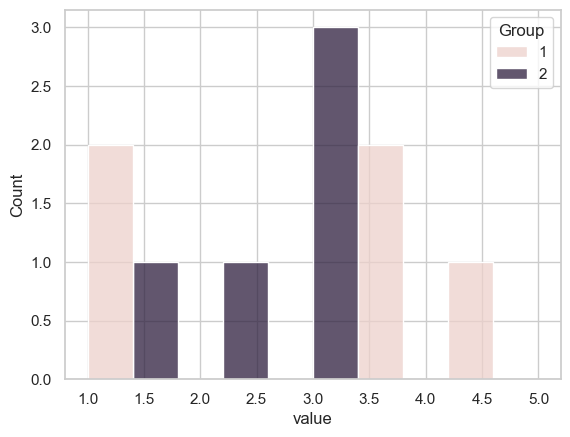

In [69]:
#plot the histo for Q1
f = sns.histplot(dataQuestionnaire[dataQuestionnaire['attribute'] == 'Q1'], x='value', hue='Group', multiple="dodge")
#Save the figure
f.figure.savefig('Q1_histo.png')

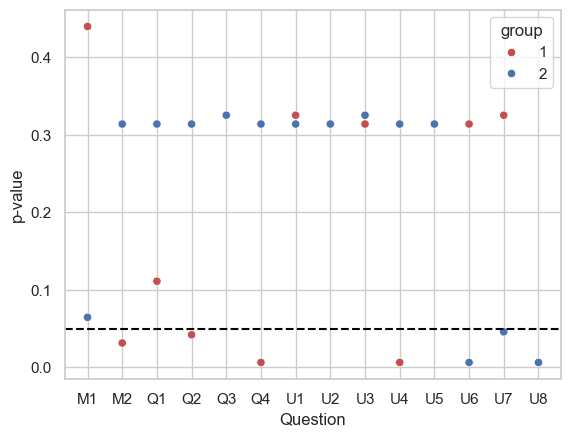

In [116]:
#Normality test with Shapiro-Wilk
from scipy.stats import shapiro

#create dataset normality with 'group' 'attribute' and 'normality_p'
normalityList = []

for i, metric in enumerate(['Nb of step listening', 'Nb of paper instructions watched']):
    for group in [1,2]:
        responses = dataMetrics[(dataMetrics['attribute'] == metric) & (dataMetrics['Group'] == group)]['value']
        stat, p = shapiro(responses)
        normalityList.append({'group': group, 'attribute': ["M1","M2"][i], 'normality_p': p})

#For each question, test the normality of the responses for both groups
for question in ['Q1', 'Q2', 'Q3', 'Q4']:
    for group in [1,2]:
        #Get the responses for the question and group
        responses = dataQuestionnaire[(dataQuestionnaire['attribute'] == question) & (dataQuestionnaire['Group'] == group)]['value']
        #Test the normality of the responses
        stat, p = shapiro(responses)
        #Add the result to the dataNormality dataframe
        normalityList.append({'group': group, 'attribute': question, 'normality_p': p})
    

#Same for UEQS
for question in ['U1', 'U2', 'U3', 'U4', 'U5', 'U6', 'U7', 'U8']:
    for group in [1,2]:
        responses = dataUEQS[(dataUEQS['attribute'] == question) & (dataUEQS['Group'] == group)]['value']
        stat, p = shapiro(responses)
        normalityList.append({'group': group, 'attribute': question, 'normality_p': p})
        

        
dataNormality = pd.DataFrame(normalityList)
        
#Plot the normality test results
sns.set_theme(style="whitegrid")
f = sns.scatterplot(data=dataNormality, x='attribute', y='normality_p', hue='group', palette=['r', 'b'])
#Plot a horizontal line at y=0.05
f.axhline(0.05, color='black', linestyle='--')
#Set the axis labels
f.set(xlabel='Question', ylabel='p-value')

#Save the figure
f.figure.savefig('normality_result.png')


## Perfom the t-test for each question

In [124]:
from scipy.stats import mannwhitneyu  #Perform the t-test for each question
from scipy.stats import ttest_ind

#Create a dataframe to store the t-test results
testList = []

#perfomr t-test for the metrics
rep1 = dataMetrics[dataMetrics['Group'] == 1]
rep2 = dataMetrics[dataMetrics['Group'] == 2]

#t test for number of step listening
stat, p = ttest_ind(rep1[rep1['attribute'] == 'Nb of step listening']['value'], rep2[rep2['attribute'] == 'Nb of step listening']['value'])
testList.append({'attribute': 'M1', 't_stat': stat, 'p_value': p})

# U test for number of paper instructions watched
stat, p = mannwhitneyu(rep1[rep1['attribute'] == 'Nb of paper instructions watched']['value'], rep2[rep2['attribute'] == 'Nb of paper instructions watched']['value'])
testList.append({'attribute': 'M2', 't_stat': stat, 'p_value': p})



# T test for normally distributed data
#For each question, perform the t-test for the responses of both groups
for question in ['Q1', 'Q3']:
    #Get the responses for the question for both groups
    responses1 = dataQuestionnaire[(dataQuestionnaire['attribute'] == question) & (dataQuestionnaire['Group'] == 1)]['value']
    responses2 = dataQuestionnaire[(dataQuestionnaire['attribute'] == question) & (dataQuestionnaire['Group'] == 2)]['value']
    #Perform the t-test
    stat, p = ttest_ind(responses1, responses2)
    #Add the results to the ttestList dataframe
    testList.append({'attribute': question, 't_stat': stat, 'p_value': p})
    
    # Mann-Whitney U test for non-normally distributed data
for question in ['Q2', 'Q4']:
    responses1 = dataQuestionnaire[(dataQuestionnaire['attribute'] == question) & (dataQuestionnaire['Group'] == 1)]['value']
    responses2 = dataQuestionnaire[(dataQuestionnaire['attribute'] == question) & (dataQuestionnaire['Group'] == 2)]['value']
    stat, p = mannwhitneyu(responses1, responses2)
    testList.append({'attribute': question, 't_stat': stat, 'p_value': p})
    
#Same for UEQS
for question in ['U1', 'U2', 'U3', 'U5']:
    responses1 = dataUEQS[(dataUEQS['attribute'] == question) & (dataUEQS['Group'] == 1)]['value']
    responses2 = dataUEQS[(dataUEQS['attribute'] == question) & (dataUEQS['Group'] == 2)]['value']
    stat, p = ttest_ind(responses1, responses2)
    testList.append({'attribute': question, 't_stat': stat, 'p_value': p})
    

for question in ['U4', 'U6', 'U7', 'U8']:
    responses1 = dataUEQS[(dataUEQS['attribute'] == question) & (dataUEQS['Group'] == 1)]['value']
    responses2 = dataUEQS[(dataUEQS['attribute'] == question) & (dataUEQS['Group'] == 2)]['value']
    stat, p = mannwhitneyu(responses1, responses2)
    testList.append({'attribute': question, 't_stat': stat, 'p_value': p})
    
dataTtest = pd.DataFrame(testList)

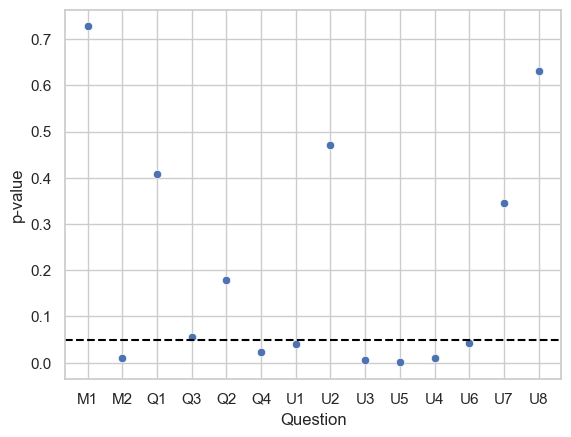

In [127]:
#Plot the t-test results
sns.set_theme(style="whitegrid")
f = sns.scatterplot(data=dataTtest, x='attribute', y='p_value')
#Set the axis labels
f.set(xlabel='Question', ylabel='p-value')
#Plot a horizontal line at y=0.05  
f.axhline(0.05, color='black', linestyle='--')

#Save the figure
f.figure.savefig('association_result.png')

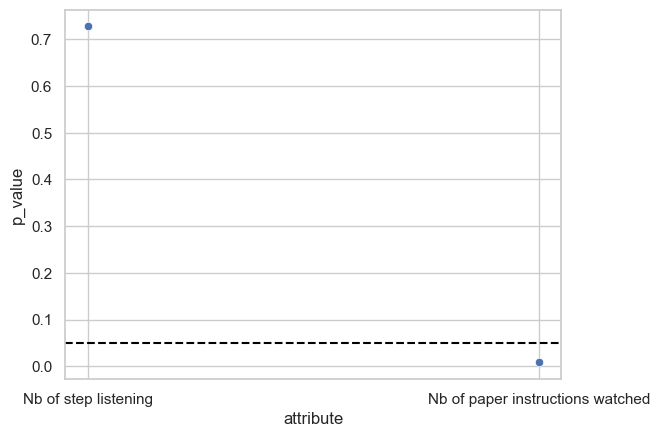

In [95]:
#Compute t test for the metrics
ttestList = []

for metric in ['Nb of step listening', 'Nb of paper instructions watched']:
    responses1 = dataMetrics[(dataMetrics['attribute'] == metric) & (dataMetrics['Group'] == 1)]['value']
    responses2 = dataMetrics[(dataMetrics['attribute'] == metric) & (dataMetrics['Group'] == 2)]['value']
    stat, p = ttest_ind(responses1, responses2)
    ttestList.append({'attribute': metric, 't_stat': stat, 'p_value': p})
    
dataTtestMetrics = pd.DataFrame(ttestList)

#Plot the t-test results
sns.set_theme(style="whitegrid")
f = sns.scatterplot(data=dataTtestMetrics, x='attribute', y='p_value')

#Plot a horizontal line at y=0.05
f.axhline(0.05, color='black', linestyle='--')